<img src="piwrf_logo.gif" width="350" align="center">

Pi-WRF is a community driven project to facilitate education/learning related to numerical weather prediction. The [Pi-WRF GitHub](https://github.com/NCAR/pi-wrf) repository contains the necessary components and instructions to both use and contribute to the Pi-WRF project.

In [1]:
import pytz
import datetime
import numpy as np
from tzwhere import tzwhere
import ipywidgets as widgets
from  ipyleaflet import (Map, 
                         basemaps,  
                         Marker) 

# Domain selection: 
<p>Below is a map with a marker that is positioned at Boulder Colorado, the location of NCAR. You may zoom in or out using the +/- in the upper left of the map. You may grab and drag the blue marker to any location where you would like to center your gridbox.</p>

In [2]:
# coordinates default to Boulder, CO
center = [40.0150, -105.2705]
zoom = 2
n = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
marker = Marker(location=center, draggable=True)
n.add_layer(marker);
display(n)

Map(center=[40.015, -105.2705], controls=(ZoomControl(options=['zoom_in_title', 'zoom_out_text', 'position', '…

# Datetime range selection:
<p>The cell below automatically generates a datetime range based on the current time of the timezone for the map marker. The times are rounded according to the model's expected input. Current times are rounded down to the most recent appropriate hour for a start time. The end time adds six hours to the start time. It is possible to manually set the start and end times at the end of the cell if desired.</p>

In [3]:
# function for rounding times
def round_hour(x, base=6):
    return x // base * base
# time range is generated automatically based on current time at time zone of map marker
from tzwhere import tzwhere
tzwhere = tzwhere.tzwhere()
timezone_str = tzwhere.tzNameAt(marker.location[0], marker.location[1])
timezone = pytz.timezone(timezone_str)
today = datetime.datetime.now(timezone)
now = today.time()
step = now
tomorrow = today
now = now.replace(hour = round_hour(now.hour))
start_time = str(today.strftime('%m')) + "-" \
    + str(today.strftime('%d')) + "-" \
    + str(today.year) + "-" \
    + str(now.strftime('%H'))
if now.hour >= 18:
    step = step.replace(hour = 0)
    tomorrow = tomorrow.replace(day = tomorrow.day + 1)
else: 
    step = now.replace(hour = (now.hour + 6))
end_time = str(today.strftime('%m')) + "-" \
    + str(tomorrow.strftime('%d')) + "-" \
    + str(today.year) + "-" \
    + step.strftime('%H')

# you may enter the start_time and end_time manually here
# you just neec to uncomment the start_time and end_time lines and modify them as desired
# format: MM-DD-YYYY-HH
# where hour may be 00, 06, 12, or 18
# start_time = '07-24-2021-12'
# end_time = '07-24-2021-18'
# print(start_time)
# print(end_time)

In [4]:
%%bash -s "$start_time" "$end_time"
sed -i /userstartdate=/c\\userstartdate="$1" /pi-wrf/run_wrf
sed -i /userenddate=/c\\userenddate="$2" /pi-wrf/run_wrf

In [5]:
# gridbox dimensions
gridbox_width = 5
gridbox_height = 4
# generate variables for domain based on map marker
xlim = np.sort(np.array([(marker.location[1]-gridbox_width/2),(marker.location[1]+gridbox_width/2)]))
print(xlim) # longitude bounds
ylim = np.sort(np.array([(marker.location[0]-gridbox_height/2),(marker.location[0]+gridbox_height/2)]))
print(ylim) # latitude bounds

[-108.10059658 -103.10059658]
[ 39.30257109  43.30257109]


In [6]:
# call set_domain with arguments based on map marker
%cd ~/../pi-wrf/pi_wrf/pi_wrf
%pwd
%ls
from set_domain import set_domain
set_domain(xlim, ylim)

/pi-wrf/pi_wrf/pi_wrf
Pages/     __init__.py            color_schemes.py  set_domain.py
Runner.py  calculate_distance.py  map.pkl


# Initiate model
<p>The model is initiated from the cell below. The above cells should have already been executed so the appropriate inputs will be available for the model. The model will take a few minutes to run. You should wait until it finishes running before proceeding to the following cells. The cell's number will show an asterisk '*' while it is still running.</p>

In [7]:
%%bash
cd ~/../pi-wrf/pi_wrf/pi_wrf
../../run_wrf



Parsed 28 entries in GEOGRID.TBL
Processing domain 1 of 1
  Processing XLAT and XLONG
  Processing MAPFAC
  Processing F and E
  Processing ROTANG
  Processing LANDUSEF
  Calculating landmask from LANDUSEF ( WATER =  17  21 )
  Processing HGT_M
  Processing SOILTEMP
  Processing SOILCTOP
  Processing SCT_DOM
  Processing SOILCBOT
  Processing SCB_DOM
  Processing ALBEDO12M
  Processing GREENFRAC
  Processing LAI12M
  Processing SNOALB
  Processing CON
  Processing VAR
  Processing OA1
  Processing OA2
  Processing OA3
  Processing OA4
  Processing OL1
  Processing OL2
  Processing OL3
  Processing OL4

  Optional fields not processed by geogrid:
    VAR_SSO (priority=1, resolution='lowres', path='/pi-wrf/WRF_System/lib/WPS_GEOG/varsso_10m/')
    LAKE_DEPTH (priority=1, resolution='default', path='/pi-wrf/WRF_System/lib/WPS_GEOG/lake_depth/')
    URB_PARAM (priority=1, resolution='default', path='/pi-wrf/WRF_System/lib/WPS_GEOG/NUDAPT44_1km/')
    FRC_URB2D (priority=1, resolution='de

../../run_wrf: line 16: /pi-wrf/Setup/Set_Environment: No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/*.png': No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/*.gif': No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/user_saved_files/*.png': No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/Temp_WRF_Output': No such file or directory
/bin/rm: cannot remove '/pi-wrf/WRF_System/lib/DATA/*': No such file or directory
../../run_wrf: line 80: /pi-wrf/WRF_System/lib/DATA/: Is a directory
../../run_wrf: line 80: /pi-wrf/WRF_System/lib/DATA/: Is a directory
 Name of source model =>NCEP GFS Analysis       GRID   3
 Name of source model =>NCEP GFS Model          GRID   3
Note: The following floating-point exceptions are signalling: IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG


# Model Output:
<p>The cells below demonstrate how to retrieve specific plots based on the model output. When the cells are executed, the contents of the Output directory are displayed. These contain the series of plots generated from the model output. The first cell defaults to showing the Your_Domain_Relative plot. The second cell defaults to showing the hourly-temperature_06. You may access any of the available plots in the directory by changing the filename in either of these cells.</p>

/pi-wrf/Output
total 6968
4008 -rw-r--r-- 1 root root 4102868 Jul 25 02:33 Temp_WRF_Output
  64 -rw-r--r-- 1 root root   62642 Jul 25 02:33 Your_Domain.png
  56 -rw-r--r-- 1 root root   53538 Jul 25 02:34 Your_Domain_Relative.png
  96 -rw-r--r-- 1 root root   95104 Jul 25 02:33 hourly-temperature_00.png
  92 -rw-r--r-- 1 root root   93831 Jul 25 02:33 hourly-temperature_01.png
  92 -rw-r--r-- 1 root root   93739 Jul 25 02:33 hourly-temperature_02.png
  92 -rw-r--r-- 1 root root   93772 Jul 25 02:33 hourly-temperature_03.png
  92 -rw-r--r-- 1 root root   93524 Jul 25 02:33 hourly-temperature_04.png
  92 -rw-r--r-- 1 root root   93546 Jul 25 02:33 hourly-temperature_05.png
  92 -rw-r--r-- 1 root root   93757 Jul 25 02:33 hourly-temperature_06.png
  88 -rw-r--r-- 1 root root   88563 Jul 25 02:33 hourly-wind_00.png
  88 -rw-r--r-- 1 root root   89170 Jul 25 02:33 hourly-wind_01.png
  92 -rw-r--r-- 1 root root   90141 Jul 25 02:33 hourly-wind_02.png
  92 -rw-r--r-- 1 root root   90587 Jul 2

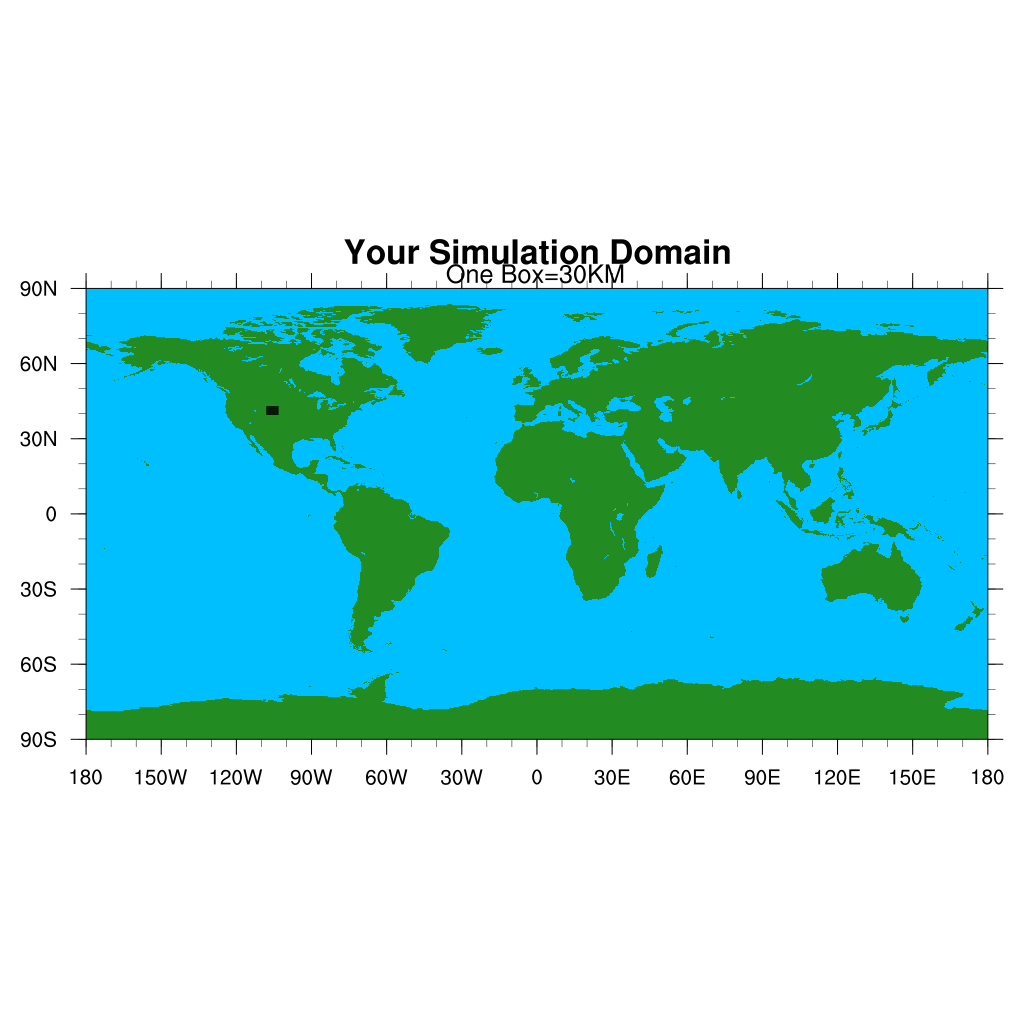

In [8]:
from IPython.display import Image
#Image(filename='test.png') 

%cd ~/../pi-wrf/Output
%pwd
%ls -ls
Image(filename='Your_Domain_Relative.png')

total 6968
4008 -rw-r--r-- 1 root root 4102868 Jul 25 02:33 Temp_WRF_Output
  64 -rw-r--r-- 1 root root   62642 Jul 25 02:33 Your_Domain.png
  56 -rw-r--r-- 1 root root   53538 Jul 25 02:34 Your_Domain_Relative.png
  96 -rw-r--r-- 1 root root   95104 Jul 25 02:33 hourly-temperature_00.png
  92 -rw-r--r-- 1 root root   93831 Jul 25 02:33 hourly-temperature_01.png
  92 -rw-r--r-- 1 root root   93739 Jul 25 02:33 hourly-temperature_02.png
  92 -rw-r--r-- 1 root root   93772 Jul 25 02:33 hourly-temperature_03.png
  92 -rw-r--r-- 1 root root   93524 Jul 25 02:33 hourly-temperature_04.png
  92 -rw-r--r-- 1 root root   93546 Jul 25 02:33 hourly-temperature_05.png
  92 -rw-r--r-- 1 root root   93757 Jul 25 02:33 hourly-temperature_06.png
  88 -rw-r--r-- 1 root root   88563 Jul 25 02:33 hourly-wind_00.png
  88 -rw-r--r-- 1 root root   89170 Jul 25 02:33 hourly-wind_01.png
  92 -rw-r--r-- 1 root root   90141 Jul 25 02:33 hourly-wind_02.png
  92 -rw-r--r-- 1 root root   90587 Jul 25 02:33 hourly-

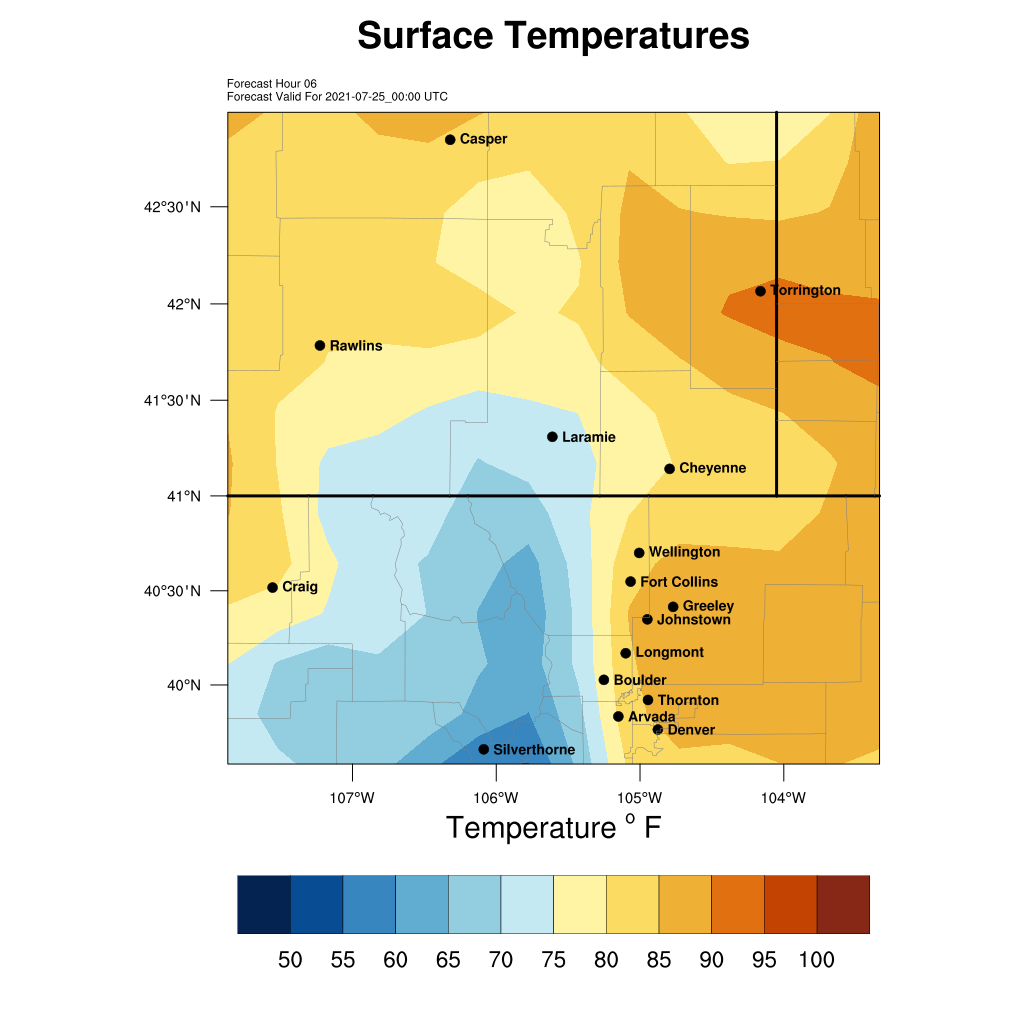

In [9]:
from IPython.display import Image
#Image(filename='test.png') 

#%cd ../../Output
%pwd
%ls -ls
Image(filename='hourly-temperature_06.png')

total 6968
4008 -rw-r--r-- 1 root root 4102868 Jul 25 02:33 Temp_WRF_Output
  64 -rw-r--r-- 1 root root   62642 Jul 25 02:33 Your_Domain.png
  56 -rw-r--r-- 1 root root   53538 Jul 25 02:34 Your_Domain_Relative.png
  96 -rw-r--r-- 1 root root   95104 Jul 25 02:33 hourly-temperature_00.png
  92 -rw-r--r-- 1 root root   93831 Jul 25 02:33 hourly-temperature_01.png
  92 -rw-r--r-- 1 root root   93739 Jul 25 02:33 hourly-temperature_02.png
  92 -rw-r--r-- 1 root root   93772 Jul 25 02:33 hourly-temperature_03.png
  92 -rw-r--r-- 1 root root   93524 Jul 25 02:33 hourly-temperature_04.png
  92 -rw-r--r-- 1 root root   93546 Jul 25 02:33 hourly-temperature_05.png
  92 -rw-r--r-- 1 root root   93757 Jul 25 02:33 hourly-temperature_06.png
  88 -rw-r--r-- 1 root root   88563 Jul 25 02:33 hourly-wind_00.png
  88 -rw-r--r-- 1 root root   89170 Jul 25 02:33 hourly-wind_01.png
  92 -rw-r--r-- 1 root root   90141 Jul 25 02:33 hourly-wind_02.png
  92 -rw-r--r-- 1 root root   90587 Jul 25 02:33 hourly-

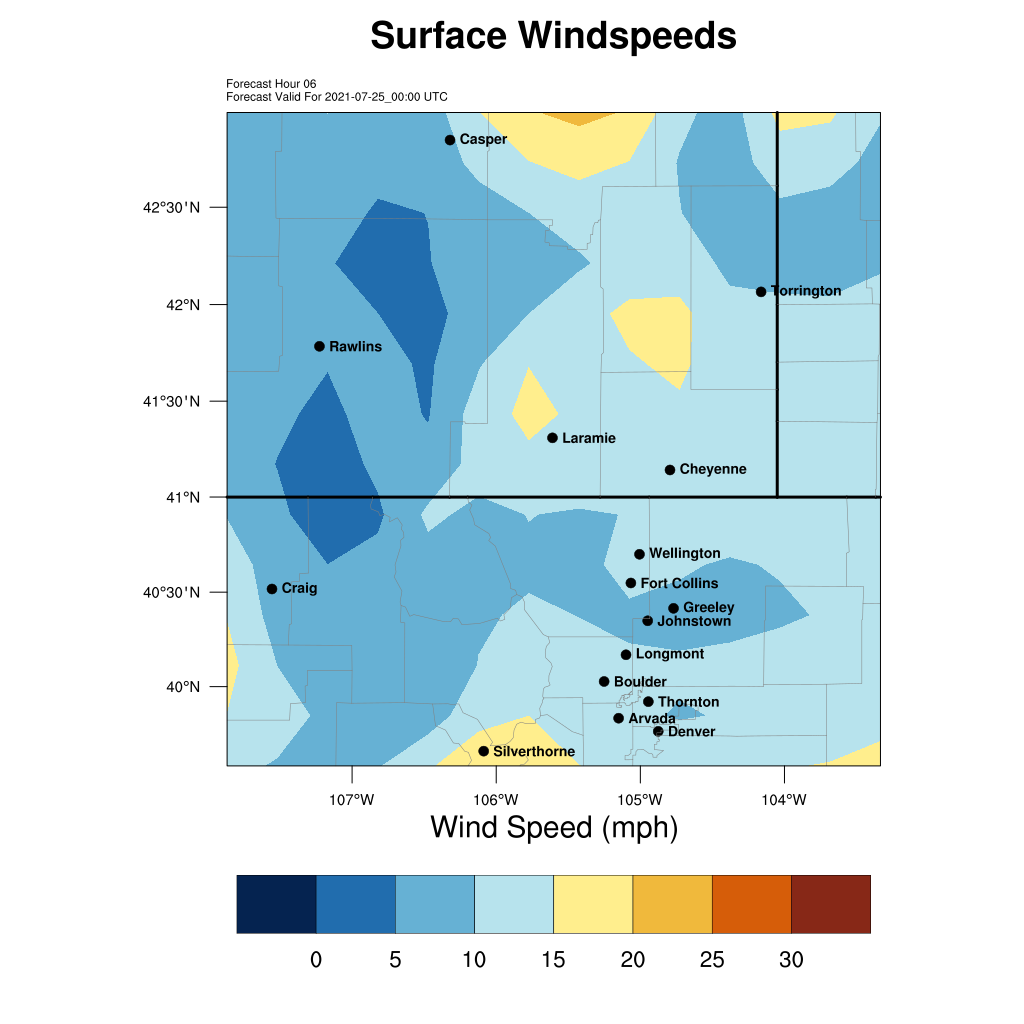

In [10]:
from IPython.display import Image
#Image(filename='test.png') 

#%cd ../../Output
%pwd
%ls -ls
Image(filename='hourly-wind_06.png')